<a href="https://colab.research.google.com/github/Maucho6340/Telecom_X_LATAM/blob/main/Challenge_CHRUN_COLAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **CHRUN DE CLIENTES**

URL: https://github.com/alura-cursos/challenge2-data-science-LATAM/blob/main/TelecomX_Data.json

In [2]:
# Cargar los datos
import pandas as pd
import requests

# Origen en GitHub
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

# Descarga datos desde la URL Github
response = requests.get(url)
data = response.json()  # Convertir JSON a diccionario o lista de Python

# Crea el DataFrame
df = pd.DataFrame(data)
df.head(10)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
5,0013-MHZWF,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
6,0013-SMEOE,No,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Two year', 'PaperlessBilling': '..."
7,0014-BMAQU,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Two year', 'PaperlessBilling': '..."
8,0015-UOCOJ,No,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
9,0016-QLJIS,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [3]:
# Expandir columnas con datos anidados
df_customer = pd.json_normalize(df['customer'])  # Información del cliente
df_phone = pd.json_normalize(df['phone'])  # Datos del servicio telefónico
df_internet = pd.json_normalize(df['internet'])  # Información del servicio de internet
df_account = pd.json_normalize(df['account'])  # Datos del contrato y pagos

# Combinar todo en un DataFrame final
df_final = pd.concat([df[['customerID', 'Churn']], df_customer, df_phone, df_internet, df_account], axis=1)

df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [4]:
# Convertir tipos de datos
# Convertir columnas numéricas
df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'], errors='coerce')

# Convertir variables categóricas a 'category' para optimizar memoria
categorical_cols = ['Churn', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                    'PaperlessBilling', 'PaymentMethod']

df_final[categorical_cols] = df_final[categorical_cols].astype('category')

# Convertir `SeniorCitizen` a booleano
df_final['SeniorCitizen'] = df_final['SeniorCitizen'].astype(bool)

# Verificar cambios
print(df_final.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7267 non-null   object  
 1   Churn             7267 non-null   category
 2   gender            7267 non-null   category
 3   SeniorCitizen     7267 non-null   bool    
 4   Partner           7267 non-null   category
 5   Dependents        7267 non-null   category
 6   tenure            7267 non-null   int64   
 7   PhoneService      7267 non-null   category
 8   MultipleLines     7267 non-null   category
 9   InternetService   7267 non-null   category
 10  OnlineSecurity    7267 non-null   category
 11  OnlineBackup      7267 non-null   category
 12  DeviceProtection  7267 non-null   category
 13  TechSupport       7267 non-null   category
 14  StreamingTV       7267 non-null   category
 15  StreamingMovies   7267 non-null   category
 16  Contract          7267 n

In [5]:
# Renombrar las columnas
#-`customerID`: número de identificación único de cada cliente
#- `Churn`: si el cliente dejó o no la empresa
#- `gender`: género (masculino y femenino)
#- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
#- `Partner`: si el cliente tiene o no una pareja
#- `Dependents`: si el cliente tiene o no dependientes
#- `tenure`: meses de contrato del cliente
#- `PhoneService`: suscripción al servicio telefónico
#- `MultipleLines`: suscripción a más de una línea telefónica
#- `InternetService`: suscripción a un proveedor de internet
#- `OnlineSecurity`: suscripción adicional de seguridad en línea
#- `OnlineBackup`: suscripción adicional de respaldo en línea
#- `DeviceProtection`: suscripción adicional de protección del dispositivo
#- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
#- `StreamingTV`: suscripción de televisión por cable
#- `StreamingMovies`: suscripción de streaming de películas
#- `Contract`: tipo de contrato
#- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
#- `PaymentMethod`: forma de pago
#- `Charges.Monthly`: total de todos los servicios del cliente por mes
#- `Charges.Total`: total gastado por el cliente

# Diccionario de nombres (según el archivo en GitHub)
diccionario = {
    "customerID": "ID_Cliente",
    "Churn": "Abandona",
    "gender": "Género",
    "SeniorCitizen": "Edad_+ó=_65",
    "Partner": "Tiene_pareja",
    "Dependents": "Dependientes",
    "tenure": "Meses_de_contrato",
    "PhoneService": "Serv_telefónico",
    "MultipleLines": "Serv_líneas_múltiples",
    "InternetService": "Serv_tipo_internet",
    "OnlineSecurity": "Serv_seguridad_línea",
    "OnlineBackup": "Serv_respaldo_en_línea",
    "DeviceProtection": "Serv_protección_dispositivo",
    "TechSupport": "Serv_soporte_técnico",
    "StreamingTV": "Serv_streaming_tv",
    "StreamingMovies": "Serv_streaming_movies",
    "Contract": "Modalidad_contrato",
    "PaperlessBilling": "Facturación_electrónica",
    "PaymentMethod": "Método_de_pago",
    "Charges.Monthly": "Pago_mensual",
    "Charges.Total": "Pago_acumulado"
}

# Renombrar columnas
df_final.rename(columns=diccionario, inplace=True)
df_final.head(3)

,ID_Cliente,Abandona,Género,Edad_+ó=_65,Tiene_pareja,Dependientes,Meses_de_contrato,Serv_telefónico,Serv_líneas_múltiples,Serv_tipo_internet,...,Serv_respaldo_en_línea,Serv_protección_dispositivo,Serv_soporte_técnico,Serv_streaming_tv,Serv_streaming_movies,Modalidad_contrato,Facturación_electrónica,Método_de_pago,Pago_mensual,Pago_acumulado
0,0002-ORFBO,No,Female,False,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,False,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,False,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85


In [8]:
# Análisis inicial
import seaborn as sns
import matplotlib.pyplot as plt



In [9]:
# Ver distribución de cancelaciones
print('|r| ±0.00 - ±0.09: correlación nula.\n|r| ±0.10 - ±0.19: correlación muy debil.\n|r| ±0.20 - ±0.49: correlación debil.\n|r| ±0.50 - ±0.69: correlación moderada.\n|r| ±0.70 - ±0.84: correlación significativa.\n|r| ±0.85 - ±0.95: correlación fuerte.\n|r| ±0.96 - ±1.00: correlación perfecta.')
print(df_final['Abandona'].value_counts(normalize=True) * 100)




|r| ±0.00 - ±0.09: correlación nula.
|r| ±0.10 - ±0.19: correlación muy debil.
|r| ±0.20 - ±0.49: correlación debil.
|r| ±0.50 - ±0.69: correlación moderada.
|r| ±0.70 - ±0.84: correlación significativa.
|r| ±0.85 - ±0.95: correlación fuerte.
|r| ±0.96 - ±1.00: correlación perfecta.
Abandona
No     71.198569
Yes    25.719004
        3.082427
Name: proportion, dtype: float64


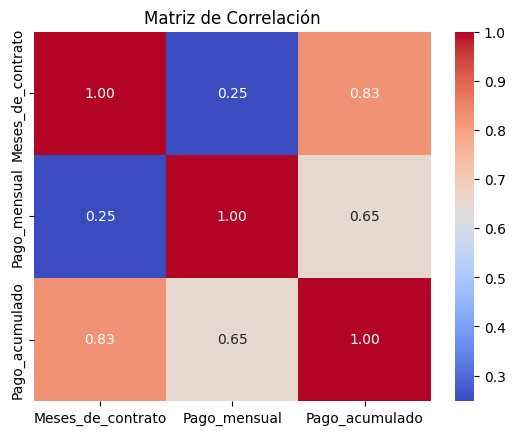

In [10]:
# Matriz de correlación (solo con columnas numéricas)
df_numeric = df_final.select_dtypes(include=['int64', 'float64'])
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()



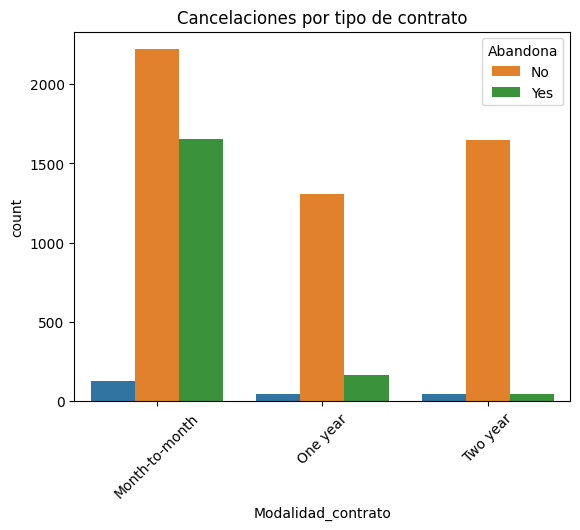

In [11]:
# Cancelaciones según tipo de contrato
sns.countplot(data=df_final, x='Modalidad_contrato', hue='Abandona')
plt.title("Cancelaciones por tipo de contrato")
plt.xticks(rotation=45)
plt.show()